**Neural Network for Number Recognition**

In [28]:
from MNISTDataset import MNISTDataset
from NeuralNetwork import NeuralNet
import torch.nn as nn
import torch
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

downloading dataset and initializing model, criterion and opimizer

In [29]:
train_dataset = MNISTDataset(r"C:\Users\shahd\OneDrive\Desktop\ml-neuralNetwork\Neural-network\archive\train-images.idx3-ubyte", r"C:\Users\shahd\OneDrive\Desktop\ml-neuralNetwork\Neural-network\archive\train-labels.idx1-ubyte")
test_dataset = MNISTDataset(r"C:\Users\shahd\OneDrive\Desktop\ml-neuralNetwork\Neural-network\archive\t10k-images.idx3-ubyte", r"C:\Users\shahd\OneDrive\Desktop\ml-neuralNetwork\Neural-network\archive\t10k-labels.idx1-ubyte")
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [50000, 10000])

default_neurons = [128, 64]
learning_rates = [0.0001, 0.001, 0.01, 0.1]
batch_sizes = [32, 64, 128, 256]
neurons = [[512, 256], [384, 192], [256, 128], [128, 64],
           [512, 256, 128], [384, 192, 96], [256, 128, 64], [128, 64, 32],
           [512, 256, 128, 64], [384, 192, 96, 48], [256, 128, 64, 32], [128, 64, 32, 16],
           [512, 256, 128, 64, 32], [384, 192, 96, 48, 24], [256, 128, 64, 32, 16], [128, 64, 32, 16, 8]
           ]

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=1000, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

epochs = 10
mymodel = NeuralNet(default_neurons)
criterion =nn.CrossEntropyLoss()
optimize=torch.optim.SGD(mymodel.parameters(),lr=0.01)

best_lr_config = {"learning_rate": None, "val_accuracy": 0}
best_bs_config = {"batch_size": None, "val_accuracy": 0}
best_neurons_config = {"neurons": None, "val_accuracy": 0}
best_layers_config = {"layers": None, "val_accuracy": 0}

# Combined best configuration
combined_best_config = {"learning_rate": None, "batch_size": None, "neurons": None, "val_accuracy": 0}

function for training and verificion and calculating losses and accuracies

In [30]:
def train_mymodel(model, train_loader, val_loader, criterion, optimizer, epochs):
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(epochs):
        # Training phase
        model.train()
        train_loss, correct, total = 0, 0, 0
        for inputs, labels in train_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

        train_accuracy = correct / total
        train_loss /= total

        model.eval()
        val_loss, val_correct, val_total = 0, 0, 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs, 1)
                val_correct += (predicted == labels).sum().item()
                val_total += labels.size(0)

        val_accuracy = val_correct / val_total
        val_loss /= val_total

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)

        print(f"Epoch {epoch+1}/{epochs}")
        print(f"  Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")
        print(f"  Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")
    return train_losses, val_losses, train_accuracies, val_accuracies

funstion for evaluationg the model and plotting confusion matrix

In [31]:
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
            all_preds.extend(predicted.numpy())
            all_labels.extend(labels.numpy())

    accuracy = correct / total
    cm = confusion_matrix(all_labels, all_preds)

    print(f"Test Accuracy: {accuracy:.4f}")

    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

function for plotting loss and accuracy

In [32]:
def plot_loss_accuracy(train_losses, val_losses, train_accuracies, val_accuracies):
    # Plotting the training and validation loss
    plt.figure(figsize=(12, 6))

    # Plot Loss
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
    plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
    plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
    plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Train Accuracy')
    plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    # Show the plots
    plt.tight_layout()
    plt.show()

comparing different learning rates and getting the best value 

Training with learning rate: 0.0001
Epoch 1/10
  Train Loss: 2.3048, Train Accuracy: 0.0846
  Val Loss: 2.3031, Val Accuracy: 0.0874
Epoch 2/10
  Train Loss: 2.3042, Train Accuracy: 0.0882
  Val Loss: 2.3026, Val Accuracy: 0.0901
Epoch 3/10
  Train Loss: 2.3037, Train Accuracy: 0.0926
  Val Loss: 2.3020, Val Accuracy: 0.0947
Epoch 4/10
  Train Loss: 2.3031, Train Accuracy: 0.0972
  Val Loss: 2.3014, Val Accuracy: 0.0985
Epoch 5/10
  Train Loss: 2.3026, Train Accuracy: 0.1014
  Val Loss: 2.3009, Val Accuracy: 0.1023
Epoch 6/10
  Train Loss: 2.3020, Train Accuracy: 0.1063
  Val Loss: 2.3003, Val Accuracy: 0.1068
Epoch 7/10
  Train Loss: 2.3015, Train Accuracy: 0.1105
  Val Loss: 2.2998, Val Accuracy: 0.1116
Epoch 8/10
  Train Loss: 2.3009, Train Accuracy: 0.1160
  Val Loss: 2.2992, Val Accuracy: 0.1170
Epoch 9/10
  Train Loss: 2.3004, Train Accuracy: 0.1202
  Val Loss: 2.2987, Val Accuracy: 0.1220
Epoch 10/10
  Train Loss: 2.2998, Train Accuracy: 0.1249
  Val Loss: 2.2981, Val Accuracy: 

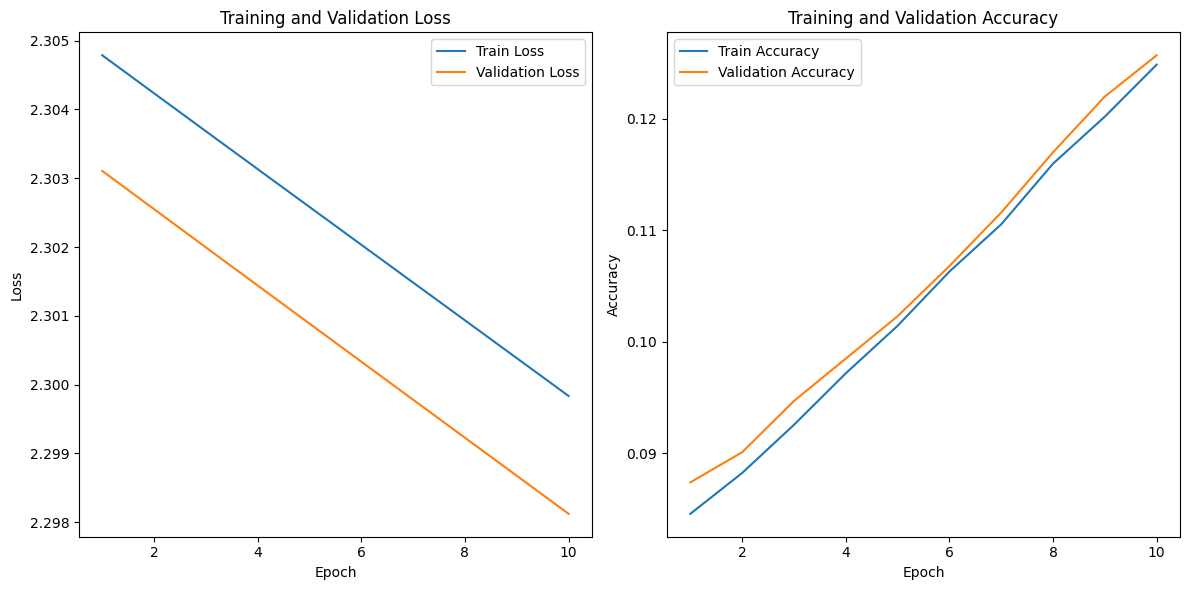

Training with learning rate: 0.001
Epoch 1/10
  Train Loss: 2.3018, Train Accuracy: 0.0810
  Val Loss: 2.2987, Val Accuracy: 0.0936
Epoch 2/10
  Train Loss: 2.2966, Train Accuracy: 0.1058
  Val Loss: 2.2934, Val Accuracy: 0.1167
Epoch 3/10
  Train Loss: 2.2913, Train Accuracy: 0.1400
  Val Loss: 2.2879, Val Accuracy: 0.1575
Epoch 4/10
  Train Loss: 2.2857, Train Accuracy: 0.1855
  Val Loss: 2.2820, Val Accuracy: 0.2109
Epoch 5/10
  Train Loss: 2.2798, Train Accuracy: 0.2397
  Val Loss: 2.2758, Val Accuracy: 0.2649
Epoch 6/10
  Train Loss: 2.2734, Train Accuracy: 0.2861
  Val Loss: 2.2690, Val Accuracy: 0.3078
Epoch 7/10
  Train Loss: 2.2665, Train Accuracy: 0.3213
  Val Loss: 2.2616, Val Accuracy: 0.3414
Epoch 8/10
  Train Loss: 2.2589, Train Accuracy: 0.3512
  Val Loss: 2.2535, Val Accuracy: 0.3684
Epoch 9/10
  Train Loss: 2.2506, Train Accuracy: 0.3790
  Val Loss: 2.2446, Val Accuracy: 0.3973
Epoch 10/10
  Train Loss: 2.2414, Train Accuracy: 0.4108
  Val Loss: 2.2347, Val Accuracy: 0

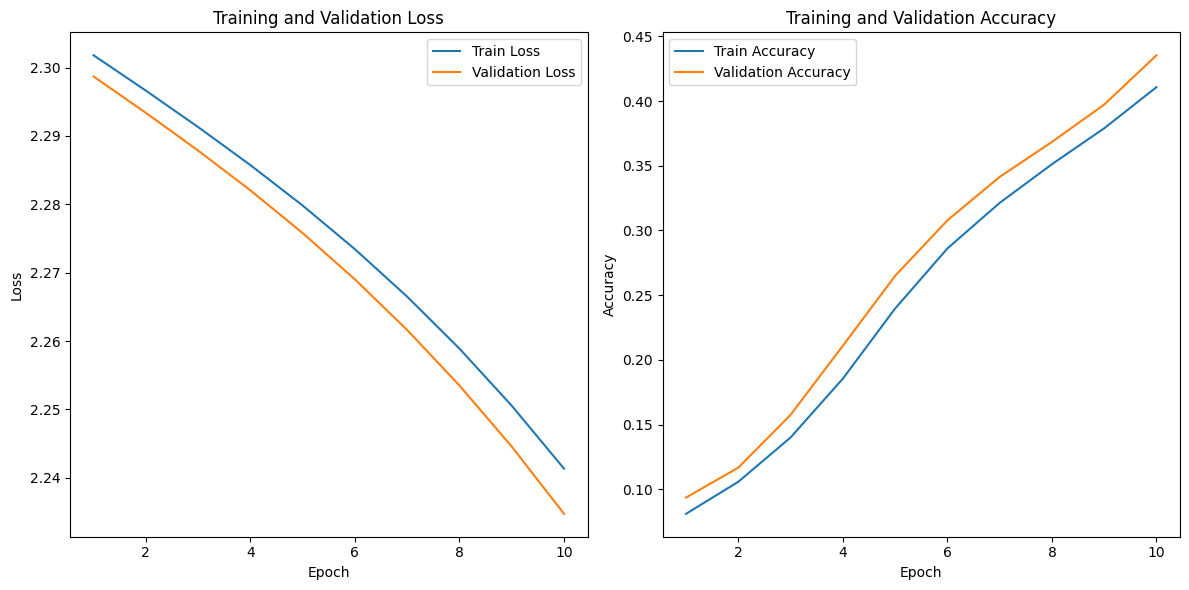

Training with learning rate: 0.01
Epoch 1/10
  Train Loss: 2.2731, Train Accuracy: 0.2084
  Val Loss: 2.2349, Val Accuracy: 0.4065
Epoch 2/10
  Train Loss: 2.1686, Train Accuracy: 0.5517
  Val Loss: 2.0708, Val Accuracy: 0.6377
Epoch 3/10
  Train Loss: 1.8996, Train Accuracy: 0.6649
  Val Loss: 1.6677, Val Accuracy: 0.7038
Epoch 4/10
  Train Loss: 1.3919, Train Accuracy: 0.7271
  Val Loss: 1.1038, Val Accuracy: 0.7735
Epoch 5/10
  Train Loss: 0.9246, Train Accuracy: 0.7936
  Val Loss: 0.7721, Val Accuracy: 0.8210
Epoch 6/10
  Train Loss: 0.6940, Train Accuracy: 0.8305
  Val Loss: 0.6203, Val Accuracy: 0.8418
Epoch 7/10
  Train Loss: 0.5803, Train Accuracy: 0.8509
  Val Loss: 0.5373, Val Accuracy: 0.8593
Epoch 8/10
  Train Loss: 0.5139, Train Accuracy: 0.8638
  Val Loss: 0.4854, Val Accuracy: 0.8710
Epoch 9/10
  Train Loss: 0.4704, Train Accuracy: 0.8730
  Val Loss: 0.4513, Val Accuracy: 0.8766
Epoch 10/10
  Train Loss: 0.4395, Train Accuracy: 0.8800
  Val Loss: 0.4238, Val Accuracy: 0.

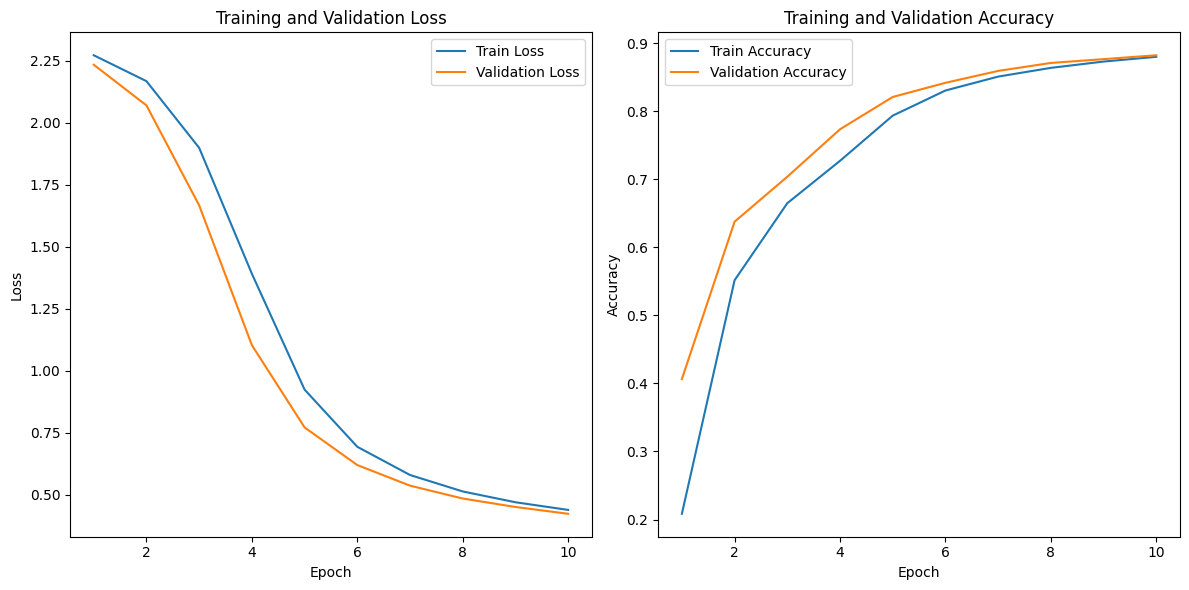

Training with learning rate: 0.1
Epoch 1/10
  Train Loss: 1.1594, Train Accuracy: 0.6781
  Val Loss: 0.4686, Val Accuracy: 0.8665
Epoch 2/10
  Train Loss: 0.3861, Train Accuracy: 0.8885
  Val Loss: 0.3704, Val Accuracy: 0.8886
Epoch 3/10
  Train Loss: 0.3171, Train Accuracy: 0.9077
  Val Loss: 0.3354, Val Accuracy: 0.9041
Epoch 4/10
  Train Loss: 0.2766, Train Accuracy: 0.9196
  Val Loss: 0.3214, Val Accuracy: 0.9007
Epoch 5/10
  Train Loss: 0.2454, Train Accuracy: 0.9290
  Val Loss: 0.2685, Val Accuracy: 0.9194
Epoch 6/10
  Train Loss: 0.2185, Train Accuracy: 0.9370
  Val Loss: 0.2221, Val Accuracy: 0.9342
Epoch 7/10
  Train Loss: 0.1959, Train Accuracy: 0.9435
  Val Loss: 0.2089, Val Accuracy: 0.9362
Epoch 8/10
  Train Loss: 0.1764, Train Accuracy: 0.9494
  Val Loss: 0.1927, Val Accuracy: 0.9448
Epoch 9/10
  Train Loss: 0.1606, Train Accuracy: 0.9541
  Val Loss: 0.1711, Val Accuracy: 0.9506
Epoch 10/10
  Train Loss: 0.1469, Train Accuracy: 0.9574
  Val Loss: 0.1597, Val Accuracy: 0.9

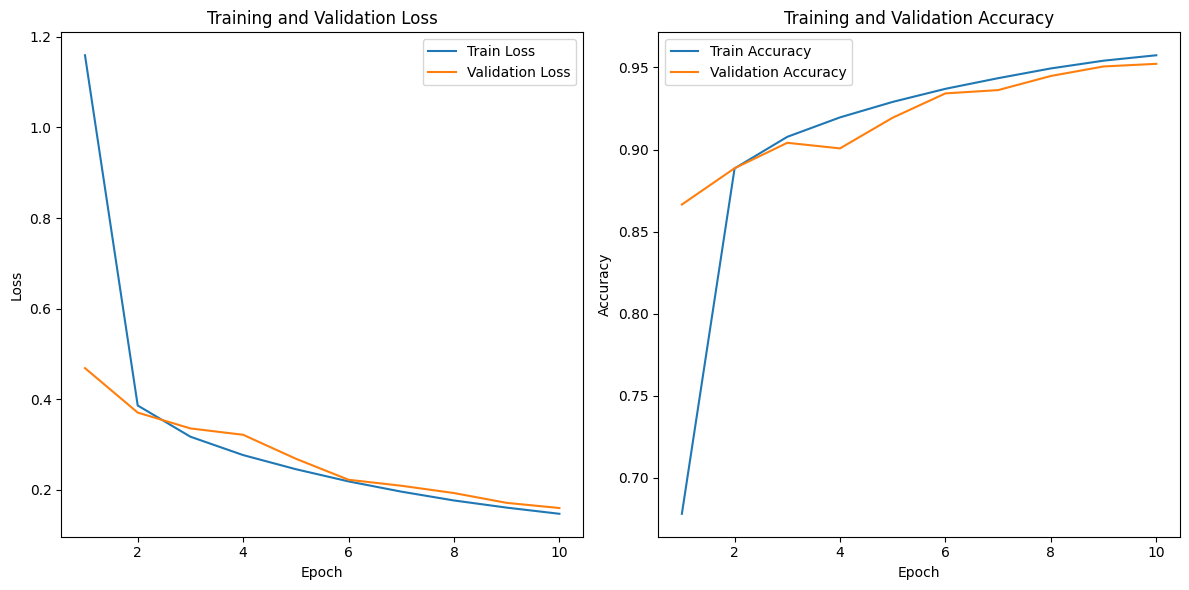

In [36]:
for lr in learning_rates:
    mymodel = NeuralNet(default_neurons)
    criterion =nn.CrossEntropyLoss()
    print(f"Training with learning rate: {lr}")
    optimizer = torch.optim.SGD(mymodel.parameters(), lr=lr)
    train_losses, val_losses, train_accuracies, val_accuracies = train_mymodel(mymodel, train_loader, val_loader, criterion, optimizer, epochs)
    plot_loss_accuracy(train_losses, val_losses, train_accuracies, val_accuracies)
    
    max_val_accuracy = max(val_accuracies)
    
    # Update the best learning rate configuration
    if max_val_accuracy > best_lr_config["val_accuracy"]:
        best_lr_config.update({"learning_rate": lr, "val_accuracy": max_val_accuracy})
    if max_val_accuracy > combined_best_config["val_accuracy"]:
        combined_best_config.update({"learning_rate": lr, "batch_size": 64, "neurons": default_neurons, "val_accuracy": max(val_accuracies)})

comparing different batch sizes and getting the best value

Training with batch size: 32
Epoch 1/10
  Train Loss: 1.3214, Train Accuracy: 0.6722
  Val Loss: 0.5149, Val Accuracy: 0.8682
Epoch 2/10
  Train Loss: 0.4152, Train Accuracy: 0.8843
  Val Loss: 0.3529, Val Accuracy: 0.8995
Epoch 3/10
  Train Loss: 0.3328, Train Accuracy: 0.9045
  Val Loss: 0.3108, Val Accuracy: 0.9111
Epoch 4/10
  Train Loss: 0.2946, Train Accuracy: 0.9157
  Val Loss: 0.2814, Val Accuracy: 0.9204
Epoch 5/10
  Train Loss: 0.2678, Train Accuracy: 0.9232
  Val Loss: 0.2570, Val Accuracy: 0.9274
Epoch 6/10
  Train Loss: 0.2441, Train Accuracy: 0.9304
  Val Loss: 0.2398, Val Accuracy: 0.9308
Epoch 7/10
  Train Loss: 0.2233, Train Accuracy: 0.9360
  Val Loss: 0.2225, Val Accuracy: 0.9379
Epoch 8/10
  Train Loss: 0.2042, Train Accuracy: 0.9419
  Val Loss: 0.2045, Val Accuracy: 0.9407
Epoch 9/10
  Train Loss: 0.1870, Train Accuracy: 0.9467
  Val Loss: 0.1887, Val Accuracy: 0.9458
Epoch 10/10
  Train Loss: 0.1725, Train Accuracy: 0.9513
  Val Loss: 0.1828, Val Accuracy: 0.9447


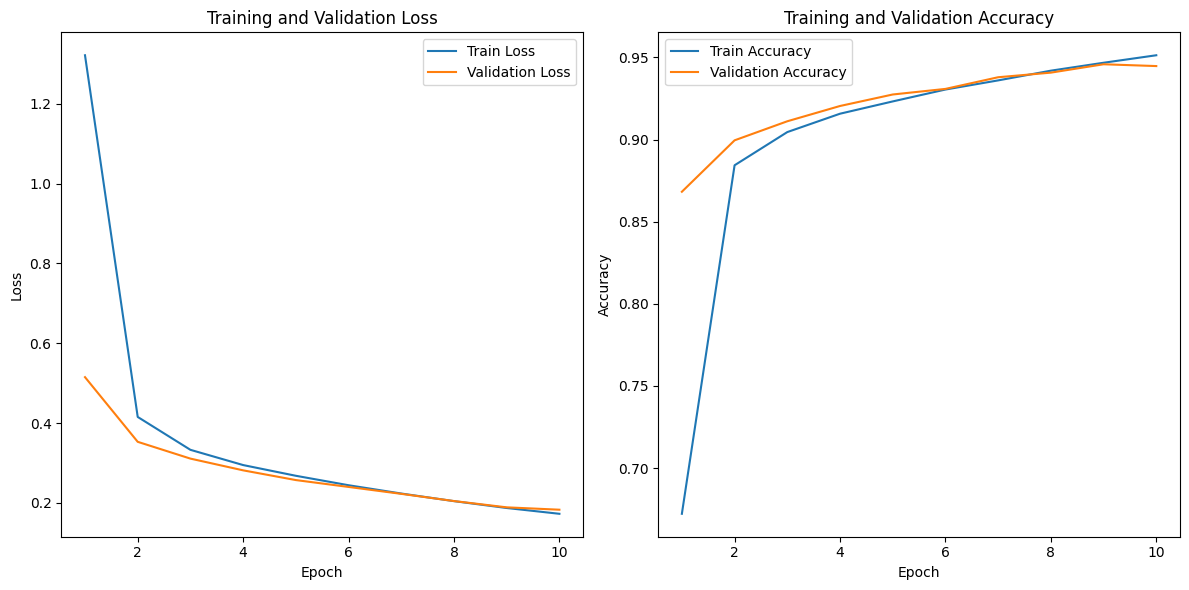

Training with batch size: 64
Epoch 1/10
  Train Loss: 1.9085, Train Accuracy: 0.4594
  Val Loss: 1.0945, Val Accuracy: 0.7773
Epoch 2/10
  Train Loss: 0.7181, Train Accuracy: 0.8190
  Val Loss: 0.5161, Val Accuracy: 0.8632
Epoch 3/10
  Train Loss: 0.4501, Train Accuracy: 0.8771
  Val Loss: 0.4022, Val Accuracy: 0.8881
Epoch 4/10
  Train Loss: 0.3791, Train Accuracy: 0.8935
  Val Loss: 0.3572, Val Accuracy: 0.9008
Epoch 5/10
  Train Loss: 0.3449, Train Accuracy: 0.9022
  Val Loss: 0.3352, Val Accuracy: 0.9041
Epoch 6/10
  Train Loss: 0.3220, Train Accuracy: 0.9089
  Val Loss: 0.3151, Val Accuracy: 0.9106
Epoch 7/10
  Train Loss: 0.3035, Train Accuracy: 0.9133
  Val Loss: 0.3053, Val Accuracy: 0.9117
Epoch 8/10
  Train Loss: 0.2881, Train Accuracy: 0.9186
  Val Loss: 0.2847, Val Accuracy: 0.9190
Epoch 9/10
  Train Loss: 0.2736, Train Accuracy: 0.9227
  Val Loss: 0.2753, Val Accuracy: 0.9213
Epoch 10/10
  Train Loss: 0.2605, Train Accuracy: 0.9255
  Val Loss: 0.2652, Val Accuracy: 0.9226


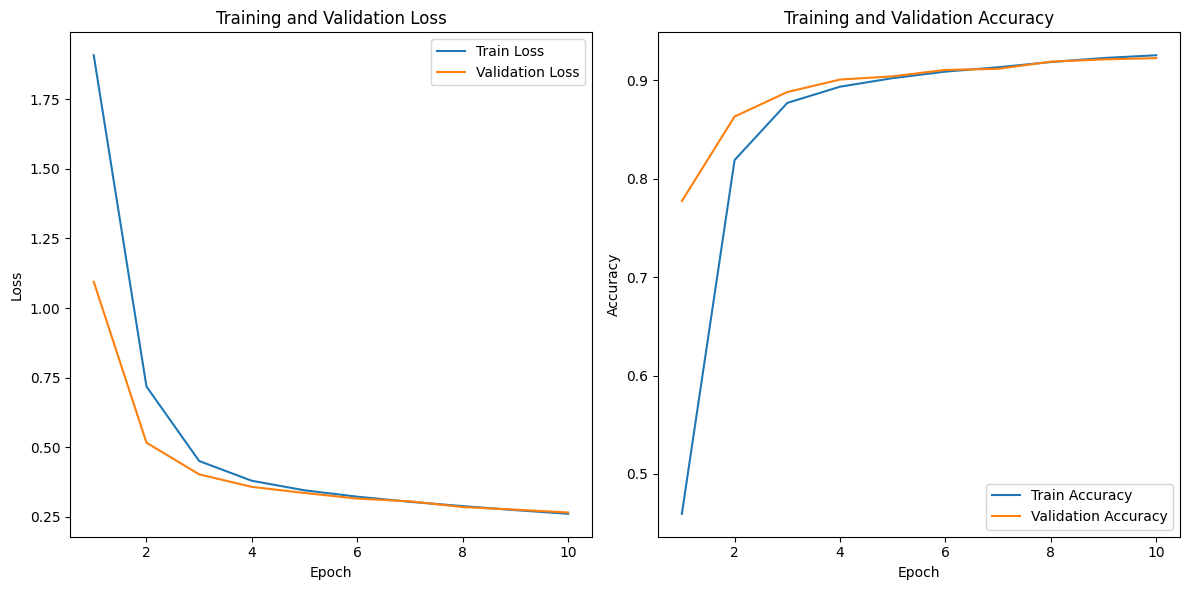

Training with batch size: 128
Epoch 1/10
  Train Loss: 2.2087, Train Accuracy: 0.3311
  Val Loss: 2.0278, Val Accuracy: 0.6139
Epoch 2/10
  Train Loss: 1.5568, Train Accuracy: 0.6707
  Val Loss: 1.0541, Val Accuracy: 0.7615
Epoch 3/10
  Train Loss: 0.8306, Train Accuracy: 0.7905
  Val Loss: 0.6622, Val Accuracy: 0.8252
Epoch 4/10
  Train Loss: 0.5847, Train Accuracy: 0.8423
  Val Loss: 0.5149, Val Accuracy: 0.8597
Epoch 5/10
  Train Loss: 0.4784, Train Accuracy: 0.8697
  Val Loss: 0.4399, Val Accuracy: 0.8814
Epoch 6/10
  Train Loss: 0.4216, Train Accuracy: 0.8842
  Val Loss: 0.3992, Val Accuracy: 0.8915
Epoch 7/10
  Train Loss: 0.3866, Train Accuracy: 0.8924
  Val Loss: 0.3715, Val Accuracy: 0.8959
Epoch 8/10
  Train Loss: 0.3634, Train Accuracy: 0.8983
  Val Loss: 0.3527, Val Accuracy: 0.9004
Epoch 9/10
  Train Loss: 0.3458, Train Accuracy: 0.9027
  Val Loss: 0.3408, Val Accuracy: 0.9027
Epoch 10/10
  Train Loss: 0.3316, Train Accuracy: 0.9058
  Val Loss: 0.3275, Val Accuracy: 0.9066

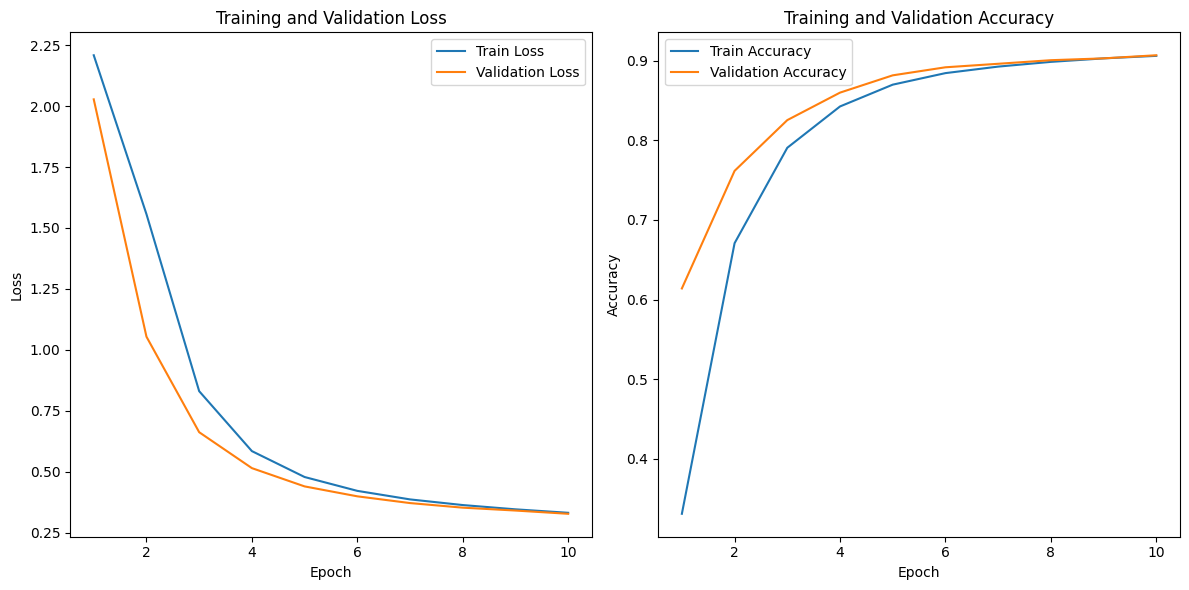

Training with batch size: 256
Epoch 1/10
  Train Loss: 2.2779, Train Accuracy: 0.2060
  Val Loss: 2.2402, Val Accuracy: 0.3285
Epoch 2/10
  Train Loss: 2.1730, Train Accuracy: 0.4216
  Val Loss: 2.0680, Val Accuracy: 0.5240
Epoch 3/10
  Train Loss: 1.8786, Train Accuracy: 0.5723
  Val Loss: 1.6245, Val Accuracy: 0.6547
Epoch 4/10
  Train Loss: 1.3537, Train Accuracy: 0.7038
  Val Loss: 1.0843, Val Accuracy: 0.7478
Epoch 5/10
  Train Loss: 0.9262, Train Accuracy: 0.7752
  Val Loss: 0.7855, Val Accuracy: 0.8092
Epoch 6/10
  Train Loss: 0.7099, Train Accuracy: 0.8178
  Val Loss: 0.6355, Val Accuracy: 0.8373
Epoch 7/10
  Train Loss: 0.5951, Train Accuracy: 0.8425
  Val Loss: 0.5493, Val Accuracy: 0.8543
Epoch 8/10
  Train Loss: 0.5259, Train Accuracy: 0.8584
  Val Loss: 0.4943, Val Accuracy: 0.8651
Epoch 9/10
  Train Loss: 0.4800, Train Accuracy: 0.8695
  Val Loss: 0.4577, Val Accuracy: 0.8732
Epoch 10/10
  Train Loss: 0.4472, Train Accuracy: 0.8767
  Val Loss: 0.4287, Val Accuracy: 0.8790

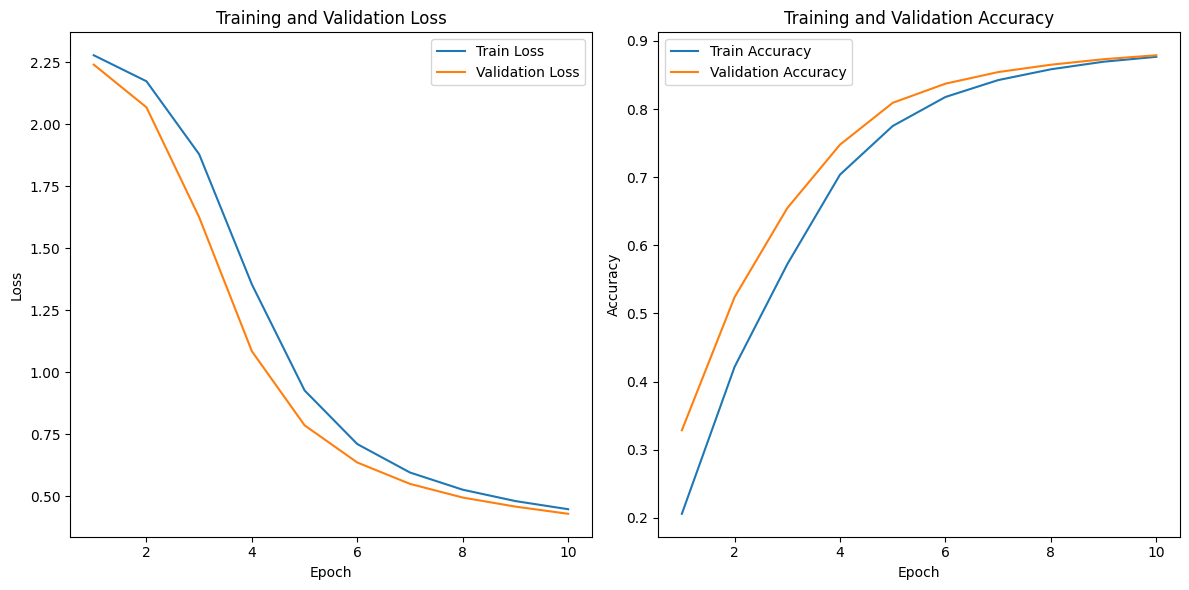

In [34]:
for bs in batch_sizes:
    mymodel = NeuralNet(default_neurons)
    criterion =nn.CrossEntropyLoss()
    optimize=torch.optim.SGD(mymodel.parameters(),lr=0.01)
    print(f"Training with batch size: {bs}")
    train_loader = DataLoader(train_dataset, batch_size=bs, shuffle=True)
    train_losses, val_losses, train_accuracies, val_accuracies = train_mymodel(mymodel, train_loader, val_loader, criterion, optimize, epochs)
    plot_loss_accuracy(train_losses, val_losses, train_accuracies, val_accuracies)
    
    max_val_accuracy = max(val_accuracies)
    
    # Update the best batch size configuration
    if max_val_accuracy > best_bs_config["val_accuracy"]:
        best_bs_config.update({"batch_size": bs, "val_accuracy": max_val_accuracy})
    if max_val_accuracy > combined_best_config["val_accuracy"]:
        combined_best_config.update({"learning_rate": 0.01, "batch_size": bs, "neurons": default_neurons, "val_accuracy": max(val_accuracies)})

comparing different neuron and layer numbers and getting the best combination

Training with hidden layer: 2 with values: [512, 256]
Epoch 1/10
  Train Loss: 1.8053, Train Accuracy: 0.5964
  Val Loss: 0.9190, Val Accuracy: 0.8004
Epoch 2/10
  Train Loss: 0.6246, Train Accuracy: 0.8434
  Val Loss: 0.4729, Val Accuracy: 0.8730
Epoch 3/10
  Train Loss: 0.4186, Train Accuracy: 0.8838
  Val Loss: 0.3865, Val Accuracy: 0.8903
Epoch 4/10
  Train Loss: 0.3589, Train Accuracy: 0.8982
  Val Loss: 0.3384, Val Accuracy: 0.9036
Epoch 5/10
  Train Loss: 0.3263, Train Accuracy: 0.9068
  Val Loss: 0.3158, Val Accuracy: 0.9096
Epoch 6/10
  Train Loss: 0.3036, Train Accuracy: 0.9128
  Val Loss: 0.2957, Val Accuracy: 0.9137
Epoch 7/10
  Train Loss: 0.2848, Train Accuracy: 0.9182
  Val Loss: 0.2806, Val Accuracy: 0.9212
Epoch 8/10
  Train Loss: 0.2690, Train Accuracy: 0.9233
  Val Loss: 0.2673, Val Accuracy: 0.9239
Epoch 9/10
  Train Loss: 0.2544, Train Accuracy: 0.9271
  Val Loss: 0.2564, Val Accuracy: 0.9256
Epoch 10/10
  Train Loss: 0.2412, Train Accuracy: 0.9306
  Val Loss: 0.24

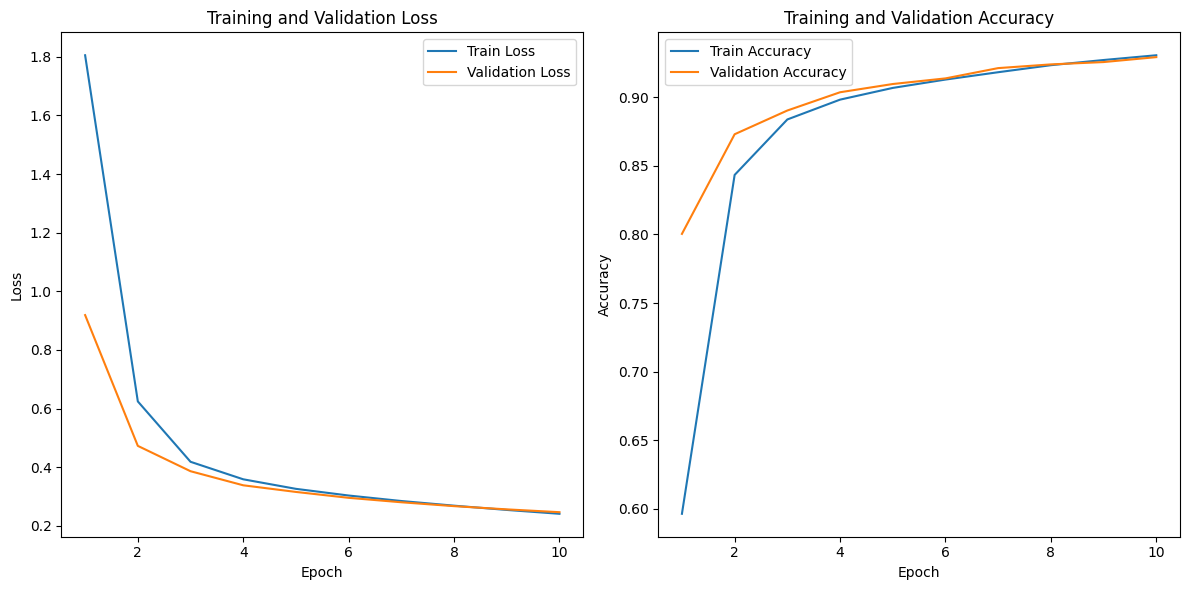

Training with hidden layer: 2 with values: [384, 192]
Epoch 1/10
  Train Loss: 1.8416, Train Accuracy: 0.6007
  Val Loss: 0.9583, Val Accuracy: 0.7863
Epoch 2/10
  Train Loss: 0.6449, Train Accuracy: 0.8336
  Val Loss: 0.4831, Val Accuracy: 0.8717
Epoch 3/10
  Train Loss: 0.4284, Train Accuracy: 0.8813
  Val Loss: 0.3858, Val Accuracy: 0.8934
Epoch 4/10
  Train Loss: 0.3638, Train Accuracy: 0.8974
  Val Loss: 0.3465, Val Accuracy: 0.9024
Epoch 5/10
  Train Loss: 0.3288, Train Accuracy: 0.9061
  Val Loss: 0.3159, Val Accuracy: 0.9115
Epoch 6/10
  Train Loss: 0.3039, Train Accuracy: 0.9125
  Val Loss: 0.2942, Val Accuracy: 0.9169
Epoch 7/10
  Train Loss: 0.2836, Train Accuracy: 0.9183
  Val Loss: 0.2779, Val Accuracy: 0.9193
Epoch 8/10
  Train Loss: 0.2664, Train Accuracy: 0.9236
  Val Loss: 0.2634, Val Accuracy: 0.9233
Epoch 9/10
  Train Loss: 0.2510, Train Accuracy: 0.9282
  Val Loss: 0.2550, Val Accuracy: 0.9257
Epoch 10/10
  Train Loss: 0.2372, Train Accuracy: 0.9329
  Val Loss: 0.23

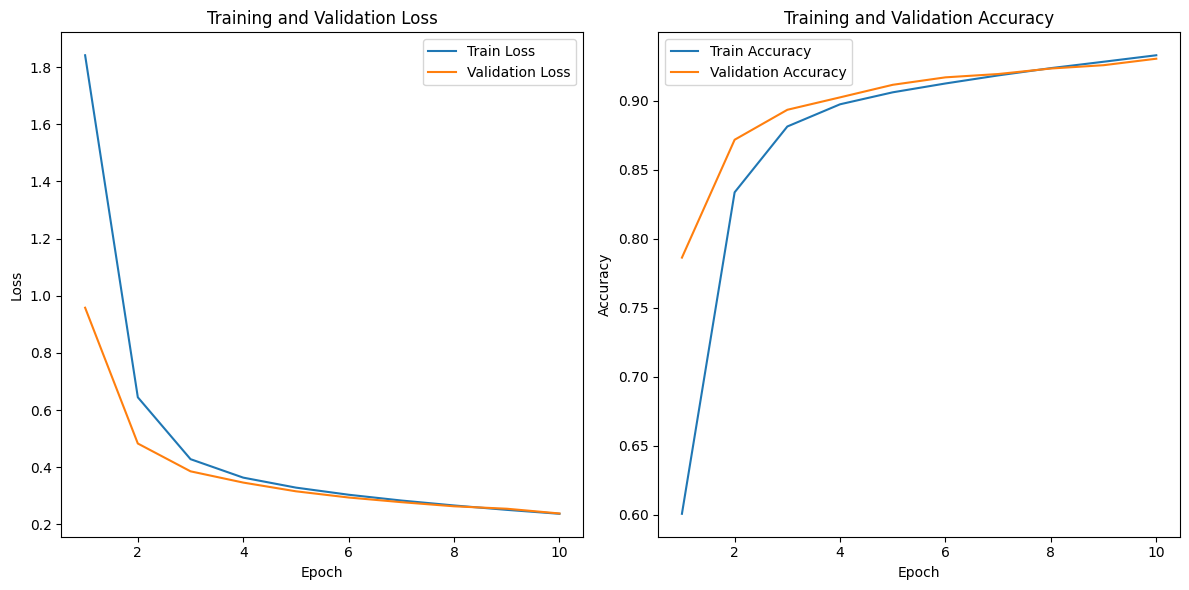

Training with hidden layer: 2 with values: [256, 128]
Epoch 1/10
  Train Loss: 1.8158, Train Accuracy: 0.5101
  Val Loss: 0.9394, Val Accuracy: 0.7819
Epoch 2/10
  Train Loss: 0.6299, Train Accuracy: 0.8368
  Val Loss: 0.4756, Val Accuracy: 0.8689
Epoch 3/10
  Train Loss: 0.4208, Train Accuracy: 0.8838
  Val Loss: 0.3809, Val Accuracy: 0.8932
Epoch 4/10
  Train Loss: 0.3577, Train Accuracy: 0.8986
  Val Loss: 0.3366, Val Accuracy: 0.9025
Epoch 5/10
  Train Loss: 0.3247, Train Accuracy: 0.9079
  Val Loss: 0.3148, Val Accuracy: 0.9091
Epoch 6/10
  Train Loss: 0.3024, Train Accuracy: 0.9138
  Val Loss: 0.2978, Val Accuracy: 0.9142
Epoch 7/10
  Train Loss: 0.2842, Train Accuracy: 0.9182
  Val Loss: 0.2852, Val Accuracy: 0.9160
Epoch 8/10
  Train Loss: 0.2688, Train Accuracy: 0.9227
  Val Loss: 0.2656, Val Accuracy: 0.9222
Epoch 9/10
  Train Loss: 0.2542, Train Accuracy: 0.9274
  Val Loss: 0.2577, Val Accuracy: 0.9259
Epoch 10/10
  Train Loss: 0.2416, Train Accuracy: 0.9308
  Val Loss: 0.24

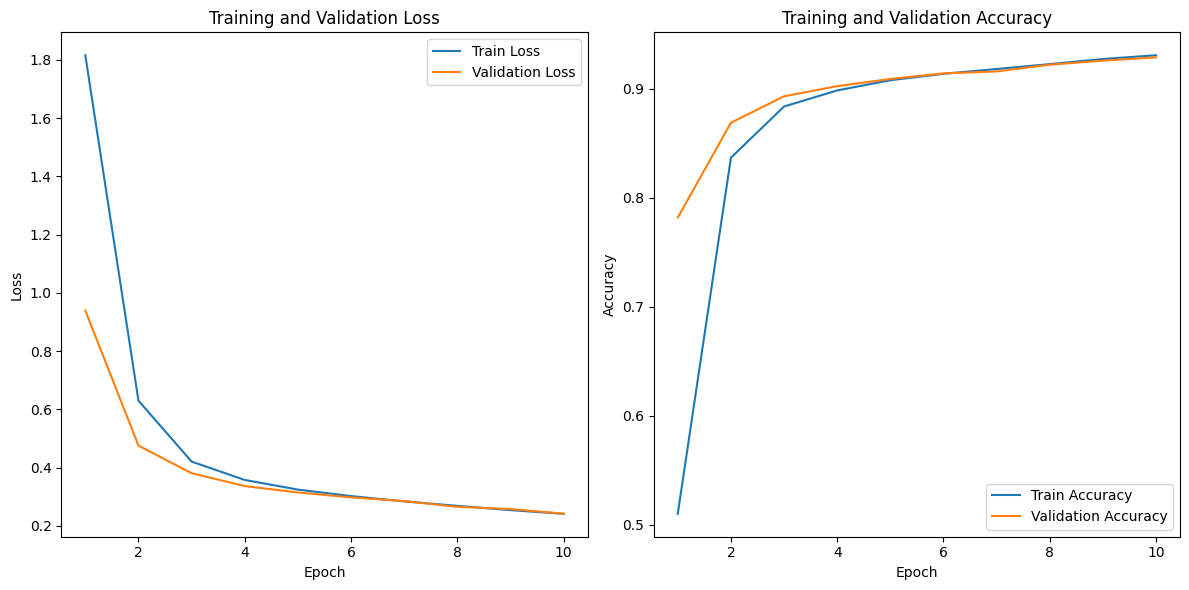

Training with hidden layer: 2 with values: [128, 64]
Epoch 1/10
  Train Loss: 1.9718, Train Accuracy: 0.4634
  Val Loss: 1.1751, Val Accuracy: 0.7411
Epoch 2/10
  Train Loss: 0.7246, Train Accuracy: 0.8187
  Val Loss: 0.5054, Val Accuracy: 0.8688
Epoch 3/10
  Train Loss: 0.4437, Train Accuracy: 0.8785
  Val Loss: 0.3963, Val Accuracy: 0.8879
Epoch 4/10
  Train Loss: 0.3730, Train Accuracy: 0.8951
  Val Loss: 0.3571, Val Accuracy: 0.8992
Epoch 5/10
  Train Loss: 0.3388, Train Accuracy: 0.9036
  Val Loss: 0.3298, Val Accuracy: 0.9058
Epoch 6/10
  Train Loss: 0.3145, Train Accuracy: 0.9103
  Val Loss: 0.3060, Val Accuracy: 0.9130
Epoch 7/10
  Train Loss: 0.2965, Train Accuracy: 0.9154
  Val Loss: 0.2945, Val Accuracy: 0.9160
Epoch 8/10
  Train Loss: 0.2809, Train Accuracy: 0.9195
  Val Loss: 0.2785, Val Accuracy: 0.9188
Epoch 9/10
  Train Loss: 0.2667, Train Accuracy: 0.9237
  Val Loss: 0.2676, Val Accuracy: 0.9219
Epoch 10/10
  Train Loss: 0.2541, Train Accuracy: 0.9277
  Val Loss: 0.258

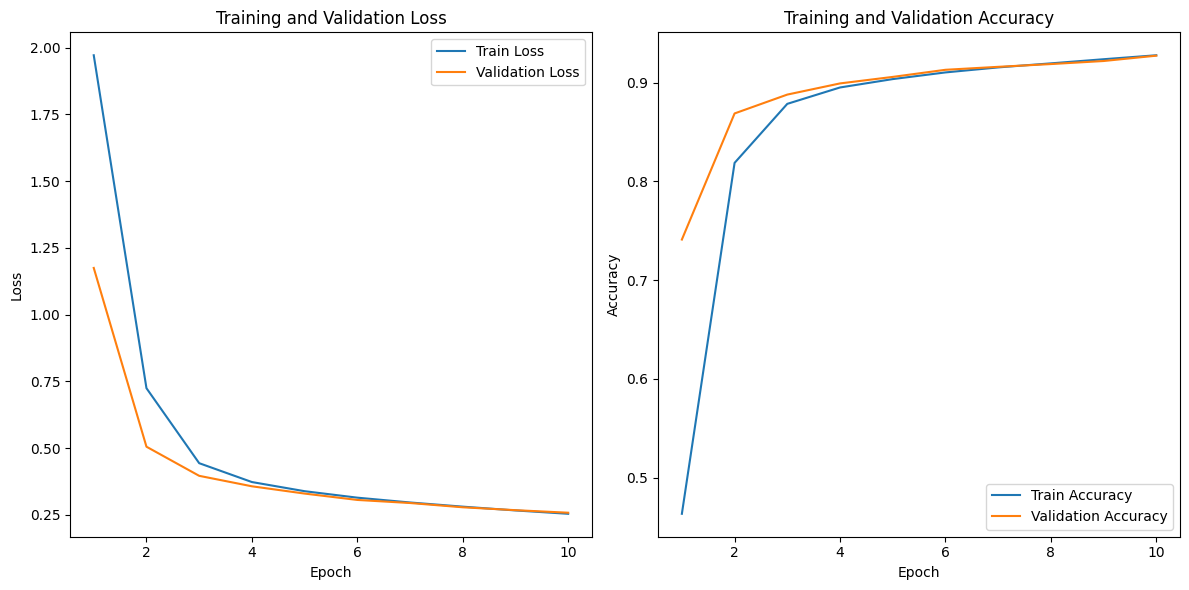

Training with hidden layer: 3 with values: [512, 256, 128]
Epoch 1/10
  Train Loss: 2.2340, Train Accuracy: 0.3806
  Val Loss: 2.0255, Val Accuracy: 0.5644
Epoch 2/10
  Train Loss: 1.1700, Train Accuracy: 0.7110
  Val Loss: 0.6542, Val Accuracy: 0.8104
Epoch 3/10
  Train Loss: 0.5348, Train Accuracy: 0.8444
  Val Loss: 0.4478, Val Accuracy: 0.8681
Epoch 4/10
  Train Loss: 0.4126, Train Accuracy: 0.8821
  Val Loss: 0.3792, Val Accuracy: 0.8922
Epoch 5/10
  Train Loss: 0.3579, Train Accuracy: 0.8978
  Val Loss: 0.3437, Val Accuracy: 0.9024
Epoch 6/10
  Train Loss: 0.3203, Train Accuracy: 0.9086
  Val Loss: 0.3094, Val Accuracy: 0.9097
Epoch 7/10
  Train Loss: 0.2898, Train Accuracy: 0.9170
  Val Loss: 0.2800, Val Accuracy: 0.9189
Epoch 8/10
  Train Loss: 0.2633, Train Accuracy: 0.9246
  Val Loss: 0.2547, Val Accuracy: 0.9283
Epoch 9/10
  Train Loss: 0.2400, Train Accuracy: 0.9312
  Val Loss: 0.2390, Val Accuracy: 0.9305
Epoch 10/10
  Train Loss: 0.2196, Train Accuracy: 0.9368
  Val Loss:

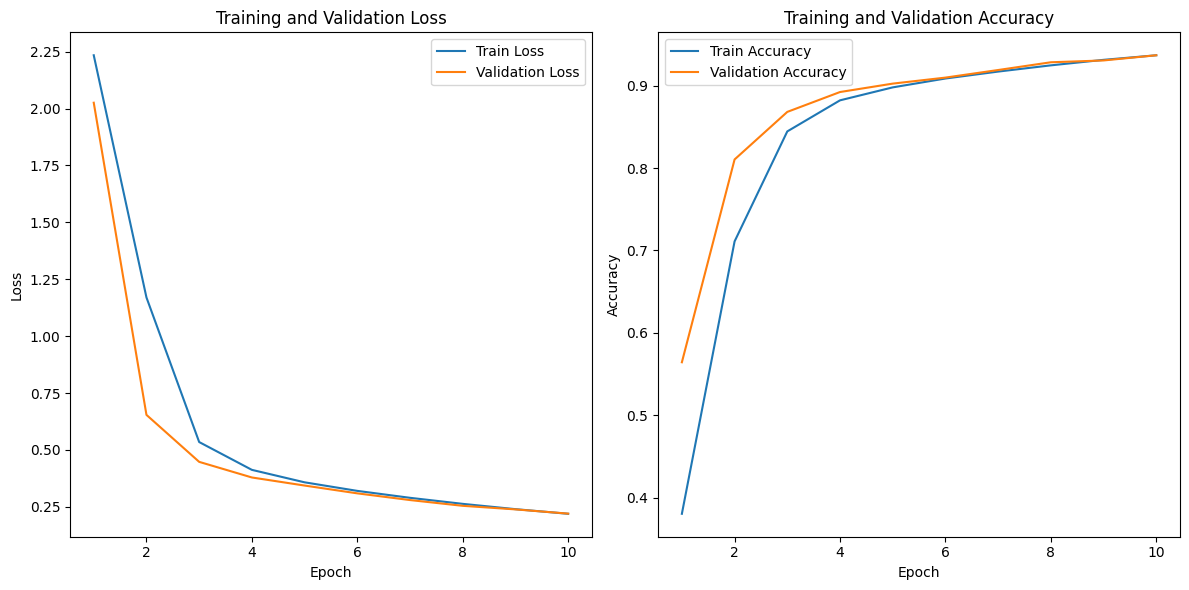

Training with hidden layer: 3 with values: [384, 192, 96]
Epoch 1/10
  Train Loss: 2.2471, Train Accuracy: 0.3189
  Val Loss: 2.0702, Val Accuracy: 0.4727
Epoch 2/10
  Train Loss: 1.3088, Train Accuracy: 0.6524
  Val Loss: 0.6901, Val Accuracy: 0.7983
Epoch 3/10
  Train Loss: 0.5468, Train Accuracy: 0.8440
  Val Loss: 0.4521, Val Accuracy: 0.8710
Epoch 4/10
  Train Loss: 0.4216, Train Accuracy: 0.8795
  Val Loss: 0.3875, Val Accuracy: 0.8888
Epoch 5/10
  Train Loss: 0.3663, Train Accuracy: 0.8965
  Val Loss: 0.3387, Val Accuracy: 0.9041
Epoch 6/10
  Train Loss: 0.3291, Train Accuracy: 0.9067
  Val Loss: 0.3145, Val Accuracy: 0.9085
Epoch 7/10
  Train Loss: 0.3006, Train Accuracy: 0.9153
  Val Loss: 0.2854, Val Accuracy: 0.9206
Epoch 8/10
  Train Loss: 0.2749, Train Accuracy: 0.9225
  Val Loss: 0.2662, Val Accuracy: 0.9238
Epoch 9/10
  Train Loss: 0.2517, Train Accuracy: 0.9285
  Val Loss: 0.2423, Val Accuracy: 0.9297
Epoch 10/10
  Train Loss: 0.2302, Train Accuracy: 0.9342
  Val Loss: 

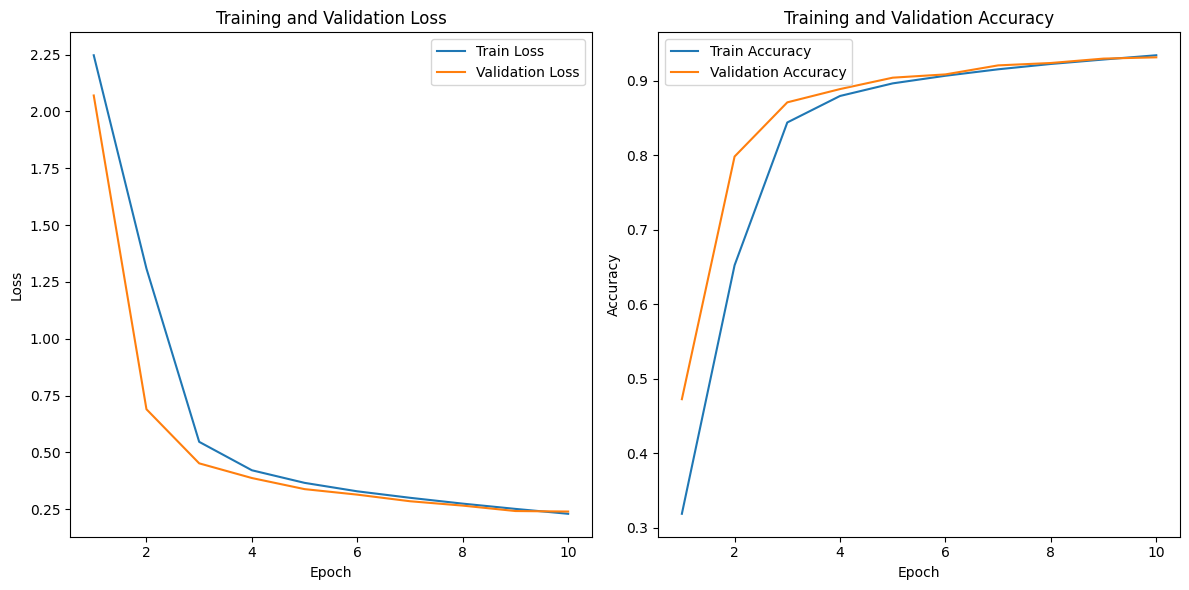

Training with hidden layer: 3 with values: [256, 128, 64]
Epoch 1/10
  Train Loss: 2.2401, Train Accuracy: 0.3157
  Val Loss: 2.0447, Val Accuracy: 0.4379
Epoch 2/10
  Train Loss: 1.2772, Train Accuracy: 0.6547
  Val Loss: 0.7502, Val Accuracy: 0.7778
Epoch 3/10
  Train Loss: 0.6011, Train Accuracy: 0.8233
  Val Loss: 0.4915, Val Accuracy: 0.8620
Epoch 4/10
  Train Loss: 0.4337, Train Accuracy: 0.8772
  Val Loss: 0.3968, Val Accuracy: 0.8843
Epoch 5/10
  Train Loss: 0.3648, Train Accuracy: 0.8965
  Val Loss: 0.3443, Val Accuracy: 0.9017
Epoch 6/10
  Train Loss: 0.3253, Train Accuracy: 0.9066
  Val Loss: 0.3127, Val Accuracy: 0.9098
Epoch 7/10
  Train Loss: 0.2948, Train Accuracy: 0.9152
  Val Loss: 0.3035, Val Accuracy: 0.9110
Epoch 8/10
  Train Loss: 0.2699, Train Accuracy: 0.9227
  Val Loss: 0.2684, Val Accuracy: 0.9225
Epoch 9/10
  Train Loss: 0.2474, Train Accuracy: 0.9285
  Val Loss: 0.2436, Val Accuracy: 0.9301
Epoch 10/10
  Train Loss: 0.2269, Train Accuracy: 0.9346
  Val Loss: 

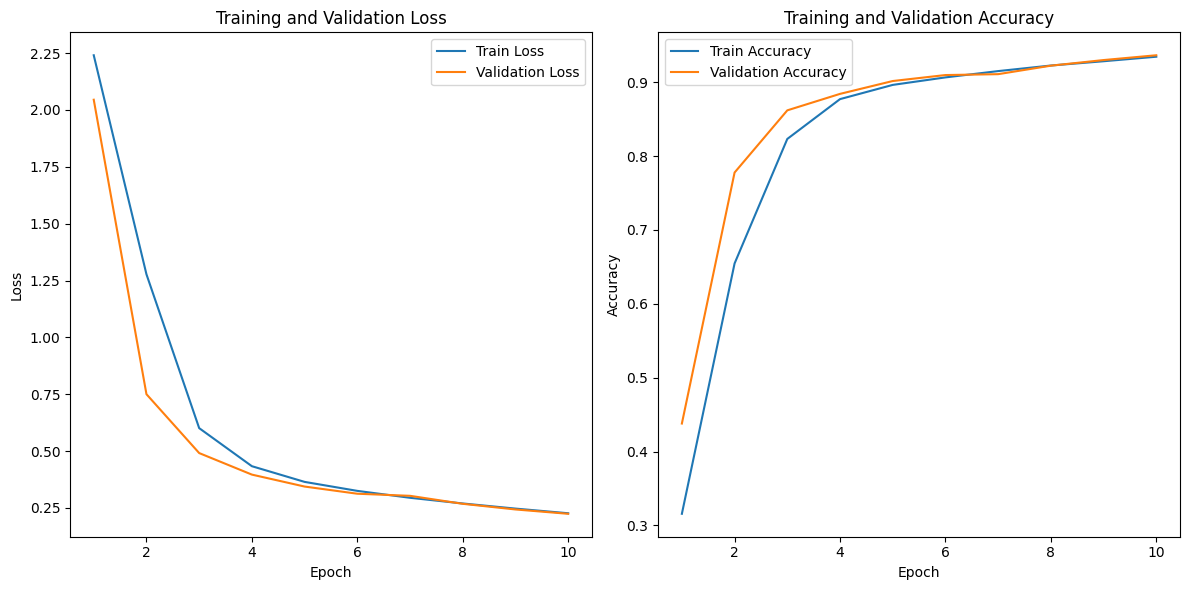

Training with hidden layer: 3 with values: [128, 64, 32]
Epoch 1/10
  Train Loss: 2.2251, Train Accuracy: 0.2590
  Val Loss: 1.9882, Val Accuracy: 0.3580
Epoch 2/10
  Train Loss: 1.2556, Train Accuracy: 0.6440
  Val Loss: 0.6918, Val Accuracy: 0.8035
Epoch 3/10
  Train Loss: 0.5565, Train Accuracy: 0.8413
  Val Loss: 0.4717, Val Accuracy: 0.8628
Epoch 4/10
  Train Loss: 0.4349, Train Accuracy: 0.8754
  Val Loss: 0.4019, Val Accuracy: 0.8802
Epoch 5/10
  Train Loss: 0.3801, Train Accuracy: 0.8915
  Val Loss: 0.3641, Val Accuracy: 0.8927
Epoch 6/10
  Train Loss: 0.3415, Train Accuracy: 0.9019
  Val Loss: 0.3279, Val Accuracy: 0.9048
Epoch 7/10
  Train Loss: 0.3121, Train Accuracy: 0.9098
  Val Loss: 0.2989, Val Accuracy: 0.9146
Epoch 8/10
  Train Loss: 0.2872, Train Accuracy: 0.9175
  Val Loss: 0.3041, Val Accuracy: 0.9096
Epoch 9/10
  Train Loss: 0.2646, Train Accuracy: 0.9239
  Val Loss: 0.2884, Val Accuracy: 0.9226
Epoch 10/10
  Train Loss: 0.2440, Train Accuracy: 0.9297
  Val Loss: 0

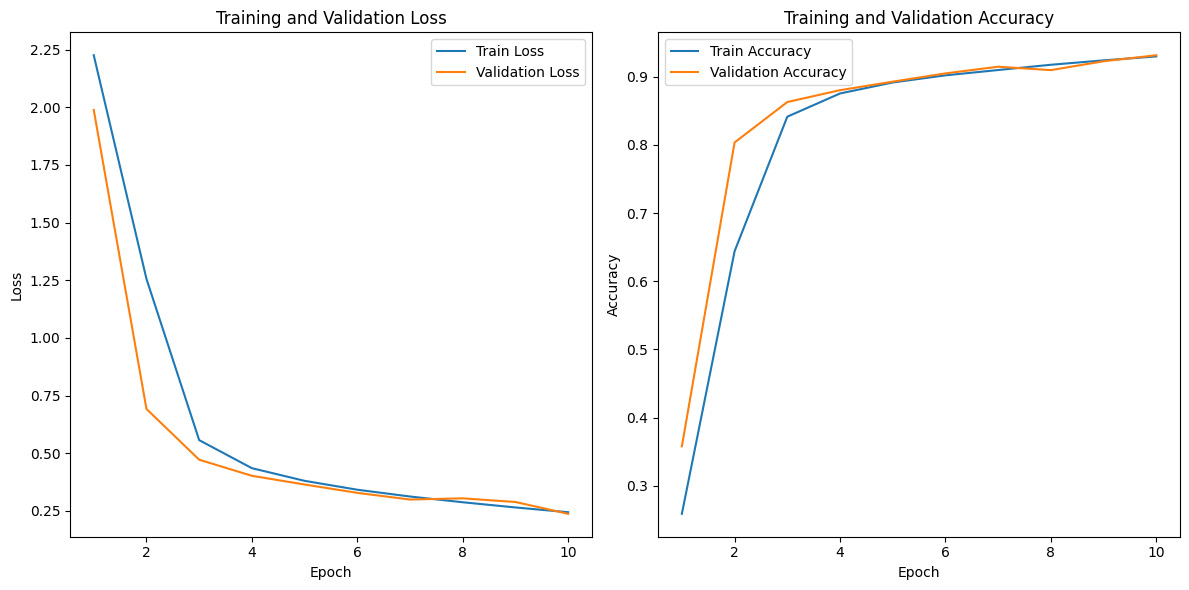

Training with hidden layer: 4 with values: [512, 256, 128, 64]
Epoch 1/10
  Train Loss: 2.2983, Train Accuracy: 0.1048
  Val Loss: 2.2899, Val Accuracy: 0.1125
Epoch 2/10
  Train Loss: 2.2684, Train Accuracy: 0.2981
  Val Loss: 2.2115, Val Accuracy: 0.4165
Epoch 3/10
  Train Loss: 1.7911, Train Accuracy: 0.4945
  Val Loss: 1.0134, Val Accuracy: 0.7223
Epoch 4/10
  Train Loss: 0.6695, Train Accuracy: 0.8051
  Val Loss: 0.5458, Val Accuracy: 0.8276
Epoch 5/10
  Train Loss: 0.4620, Train Accuracy: 0.8639
  Val Loss: 0.4116, Val Accuracy: 0.8792
Epoch 6/10
  Train Loss: 0.3928, Train Accuracy: 0.8863
  Val Loss: 0.3711, Val Accuracy: 0.8910
Epoch 7/10
  Train Loss: 0.3389, Train Accuracy: 0.9009
  Val Loss: 0.3163, Val Accuracy: 0.9100
Epoch 8/10
  Train Loss: 0.2917, Train Accuracy: 0.9154
  Val Loss: 0.2743, Val Accuracy: 0.9202
Epoch 9/10
  Train Loss: 0.2523, Train Accuracy: 0.9270
  Val Loss: 0.2360, Val Accuracy: 0.9312
Epoch 10/10
  Train Loss: 0.2207, Train Accuracy: 0.9354
  Val L

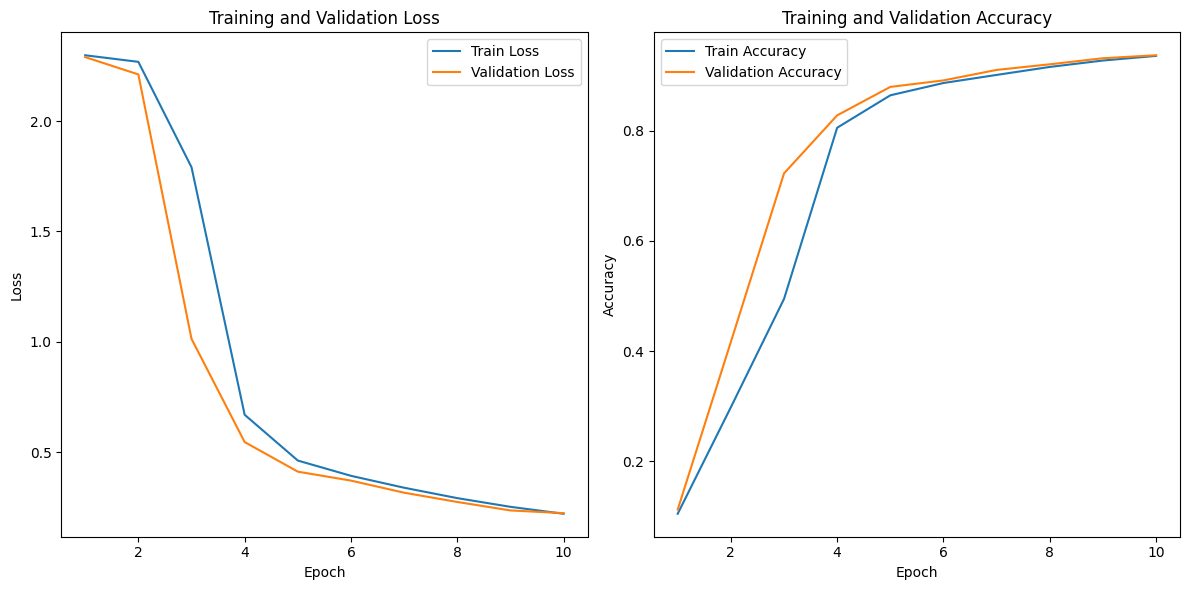

Training with hidden layer: 4 with values: [384, 192, 96, 48]
Epoch 1/10
  Train Loss: 2.2975, Train Accuracy: 0.1092
  Val Loss: 2.2854, Val Accuracy: 0.1226
Epoch 2/10
  Train Loss: 2.2319, Train Accuracy: 0.2791
  Val Loss: 2.0485, Val Accuracy: 0.3446
Epoch 3/10
  Train Loss: 1.4131, Train Accuracy: 0.5339
  Val Loss: 0.7955, Val Accuracy: 0.7600
Epoch 4/10
  Train Loss: 0.6507, Train Accuracy: 0.8014
  Val Loss: 0.5688, Val Accuracy: 0.8262
Epoch 5/10
  Train Loss: 0.5247, Train Accuracy: 0.8478
  Val Loss: 0.4691, Val Accuracy: 0.8636
Epoch 6/10
  Train Loss: 0.4429, Train Accuracy: 0.8737
  Val Loss: 0.4322, Val Accuracy: 0.8755
Epoch 7/10
  Train Loss: 0.3723, Train Accuracy: 0.8943
  Val Loss: 0.3340, Val Accuracy: 0.9071
Epoch 8/10
  Train Loss: 0.3112, Train Accuracy: 0.9120
  Val Loss: 0.2835, Val Accuracy: 0.9177
Epoch 9/10
  Train Loss: 0.2634, Train Accuracy: 0.9260
  Val Loss: 0.2454, Val Accuracy: 0.9317
Epoch 10/10
  Train Loss: 0.2244, Train Accuracy: 0.9369
  Val Lo

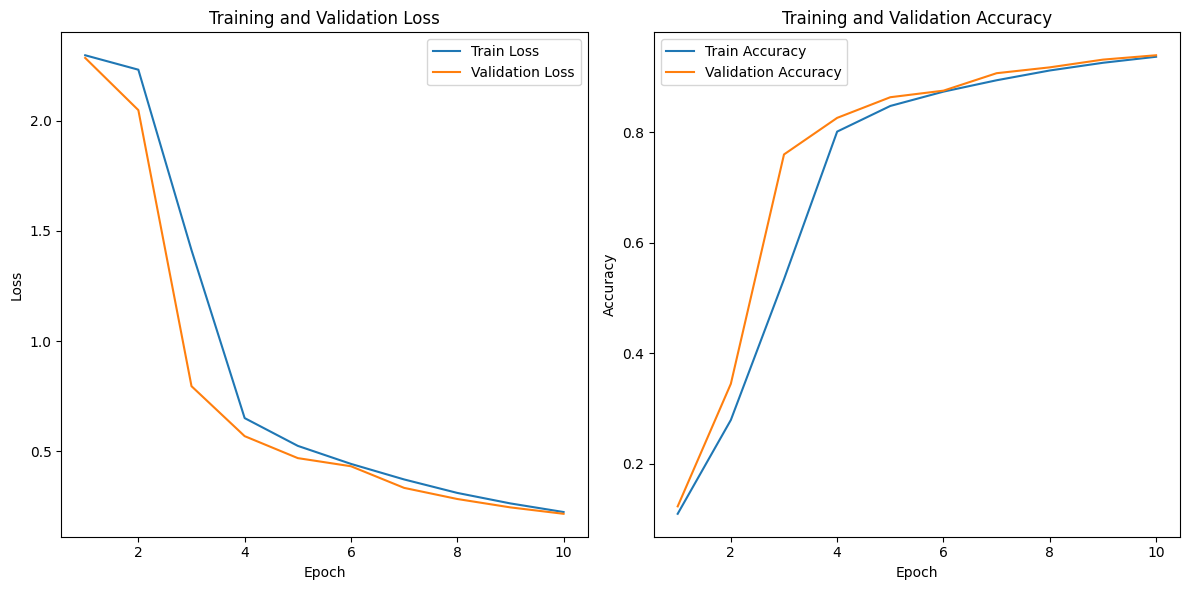

Training with hidden layer: 4 with values: [256, 128, 64, 32]
Epoch 1/10
  Train Loss: 2.3011, Train Accuracy: 0.1339
  Val Loss: 2.2913, Val Accuracy: 0.2647
Epoch 2/10
  Train Loss: 2.2594, Train Accuracy: 0.2934
  Val Loss: 2.1737, Val Accuracy: 0.3294
Epoch 3/10
  Train Loss: 1.7218, Train Accuracy: 0.4106
  Val Loss: 1.1667, Val Accuracy: 0.6521
Epoch 4/10
  Train Loss: 0.7882, Train Accuracy: 0.7559
  Val Loss: 0.6287, Val Accuracy: 0.8073
Epoch 5/10
  Train Loss: 0.5544, Train Accuracy: 0.8362
  Val Loss: 0.5013, Val Accuracy: 0.8550
Epoch 6/10
  Train Loss: 0.4440, Train Accuracy: 0.8729
  Val Loss: 0.3943, Val Accuracy: 0.8882
Epoch 7/10
  Train Loss: 0.3753, Train Accuracy: 0.8931
  Val Loss: 0.3574, Val Accuracy: 0.8979
Epoch 8/10
  Train Loss: 0.3235, Train Accuracy: 0.9078
  Val Loss: 0.3256, Val Accuracy: 0.9046
Epoch 9/10
  Train Loss: 0.2813, Train Accuracy: 0.9191
  Val Loss: 0.2668, Val Accuracy: 0.9226
Epoch 10/10
  Train Loss: 0.2466, Train Accuracy: 0.9297
  Val Lo

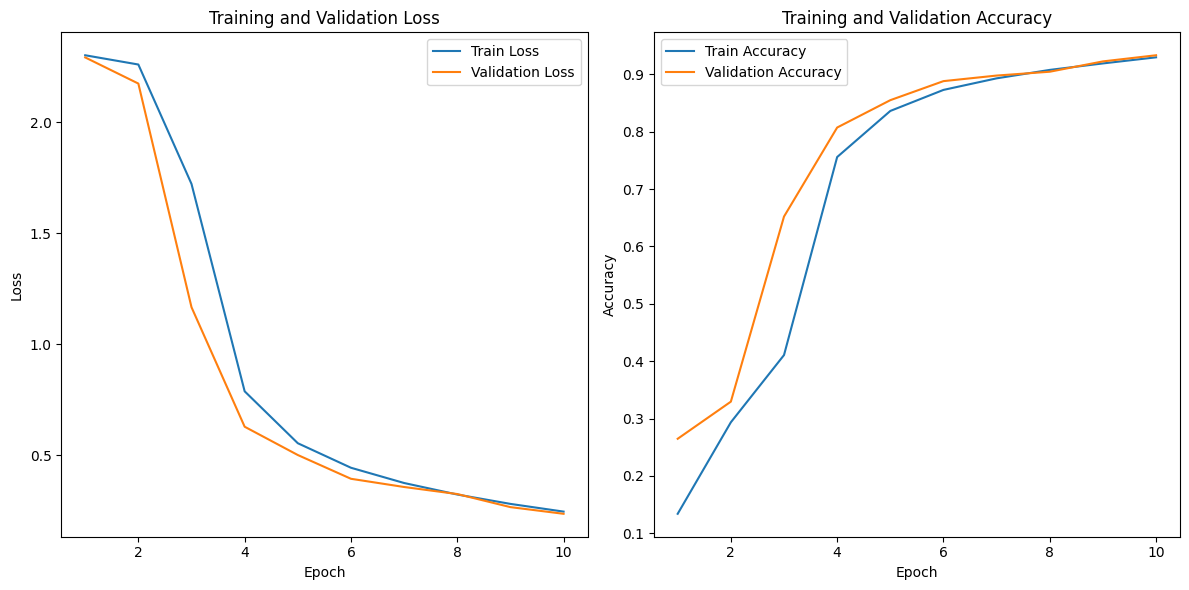

Training with hidden layer: 4 with values: [128, 64, 32, 16]
Epoch 1/10
  Train Loss: 2.3039, Train Accuracy: 0.1002
  Val Loss: 2.2966, Val Accuracy: 0.1155
Epoch 2/10
  Train Loss: 2.2820, Train Accuracy: 0.2349
  Val Loss: 2.2538, Val Accuracy: 0.3146
Epoch 3/10
  Train Loss: 2.0734, Train Accuracy: 0.2580
  Val Loss: 1.7633, Val Accuracy: 0.3530
Epoch 4/10
  Train Loss: 1.3041, Train Accuracy: 0.5581
  Val Loss: 0.9284, Val Accuracy: 0.6937
Epoch 5/10
  Train Loss: 0.7728, Train Accuracy: 0.7553
  Val Loss: 0.6266, Val Accuracy: 0.8155
Epoch 6/10
  Train Loss: 0.5610, Train Accuracy: 0.8345
  Val Loss: 0.5308, Val Accuracy: 0.8399
Epoch 7/10
  Train Loss: 0.4574, Train Accuracy: 0.8714
  Val Loss: 0.4496, Val Accuracy: 0.8697
Epoch 8/10
  Train Loss: 0.3860, Train Accuracy: 0.8909
  Val Loss: 0.3982, Val Accuracy: 0.8867
Epoch 9/10
  Train Loss: 0.3308, Train Accuracy: 0.9065
  Val Loss: 0.3503, Val Accuracy: 0.8966
Epoch 10/10
  Train Loss: 0.2877, Train Accuracy: 0.9184
  Val Los

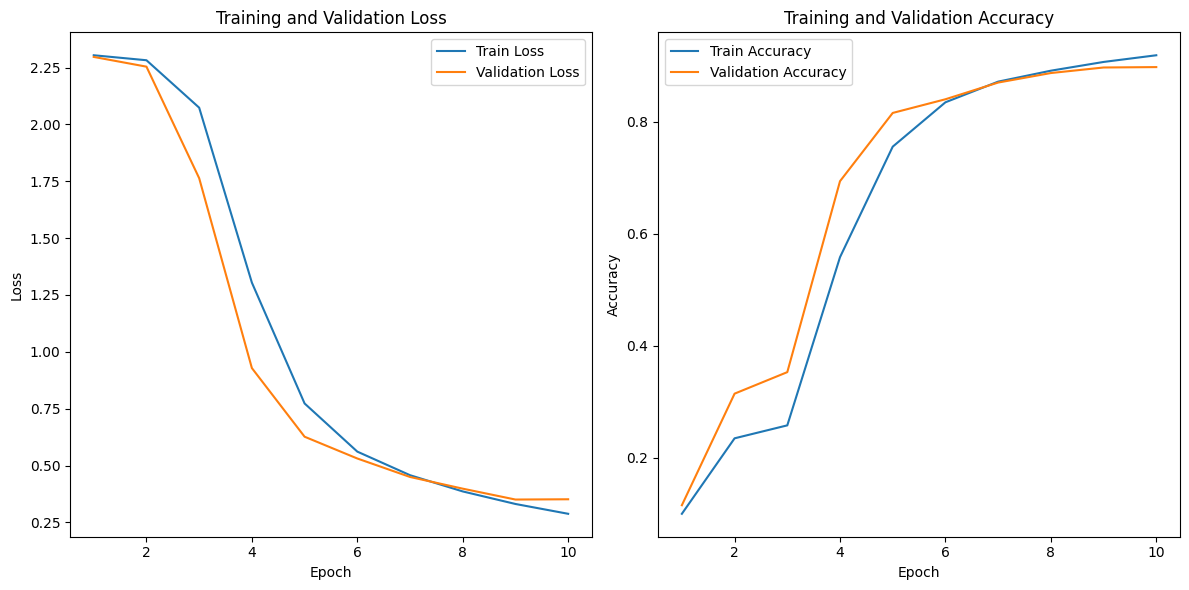

Training with hidden layer: 5 with values: [512, 256, 128, 64, 32]
Epoch 1/10
  Train Loss: 2.3042, Train Accuracy: 0.1053
  Val Loss: 2.3005, Val Accuracy: 0.1181
Epoch 2/10
  Train Loss: 2.2993, Train Accuracy: 0.1112
  Val Loss: 2.2963, Val Accuracy: 0.1181
Epoch 3/10
  Train Loss: 2.2930, Train Accuracy: 0.1113
  Val Loss: 2.2841, Val Accuracy: 0.1216
Epoch 4/10
  Train Loss: 2.2277, Train Accuracy: 0.2014
  Val Loss: 2.0538, Val Accuracy: 0.2189
Epoch 5/10
  Train Loss: 1.8337, Train Accuracy: 0.2673
  Val Loss: 1.6081, Val Accuracy: 0.3249
Epoch 6/10
  Train Loss: 1.3404, Train Accuracy: 0.5001
  Val Loss: 1.0283, Val Accuracy: 0.6292
Epoch 7/10
  Train Loss: 0.7755, Train Accuracy: 0.7360
  Val Loss: 0.5902, Val Accuracy: 0.8179
Epoch 8/10
  Train Loss: 0.5023, Train Accuracy: 0.8467
  Val Loss: 0.4203, Val Accuracy: 0.8766
Epoch 9/10
  Train Loss: 0.3780, Train Accuracy: 0.8902
  Val Loss: 0.3405, Val Accuracy: 0.9055
Epoch 10/10
  Train Loss: 0.3122, Train Accuracy: 0.9117
  V

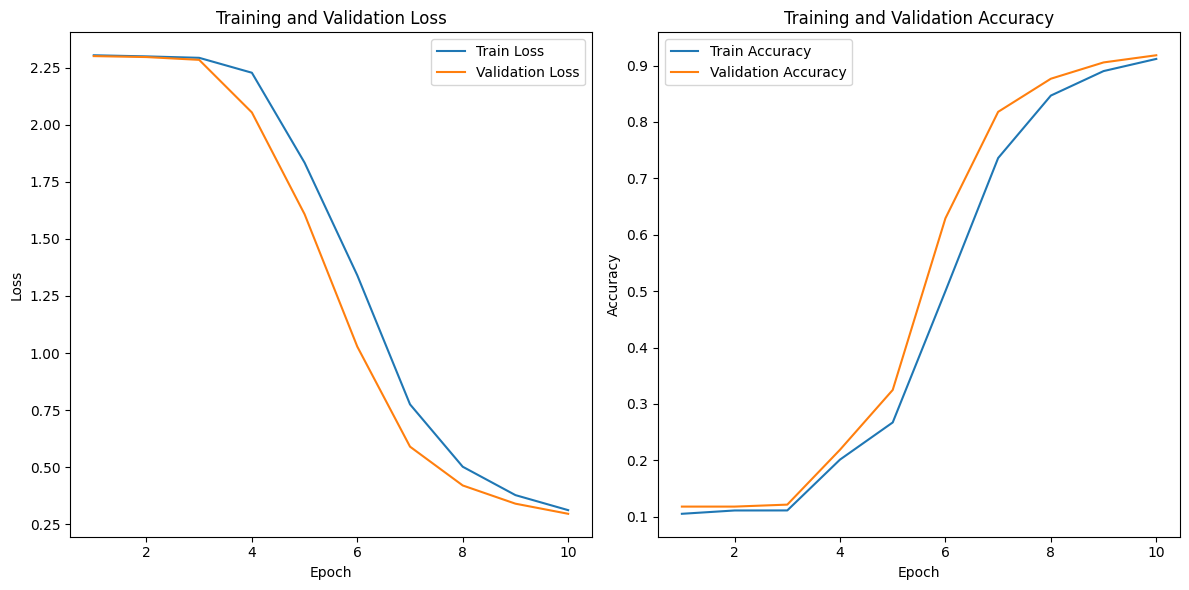

Training with hidden layer: 5 with values: [384, 192, 96, 48, 24]
Epoch 1/10
  Train Loss: 2.3041, Train Accuracy: 0.1140
  Val Loss: 2.2992, Val Accuracy: 0.1181
Epoch 2/10
  Train Loss: 2.2986, Train Accuracy: 0.1112
  Val Loss: 2.2952, Val Accuracy: 0.1181
Epoch 3/10
  Train Loss: 2.2926, Train Accuracy: 0.1119
  Val Loss: 2.2852, Val Accuracy: 0.1283
Epoch 4/10
  Train Loss: 2.2654, Train Accuracy: 0.2274
  Val Loss: 2.2123, Val Accuracy: 0.3737
Epoch 5/10
  Train Loss: 1.8951, Train Accuracy: 0.3521
  Val Loss: 1.5022, Val Accuracy: 0.4165
Epoch 6/10
  Train Loss: 1.1539, Train Accuracy: 0.6005
  Val Loss: 1.0365, Val Accuracy: 0.6247
Epoch 7/10
  Train Loss: 0.7243, Train Accuracy: 0.7623
  Val Loss: 0.7609, Val Accuracy: 0.7381
Epoch 8/10
  Train Loss: 0.5133, Train Accuracy: 0.8484
  Val Loss: 0.5784, Val Accuracy: 0.8331
Epoch 9/10
  Train Loss: 0.3747, Train Accuracy: 0.8951
  Val Loss: 0.3969, Val Accuracy: 0.8879
Epoch 10/10
  Train Loss: 0.2932, Train Accuracy: 0.9194
  Va

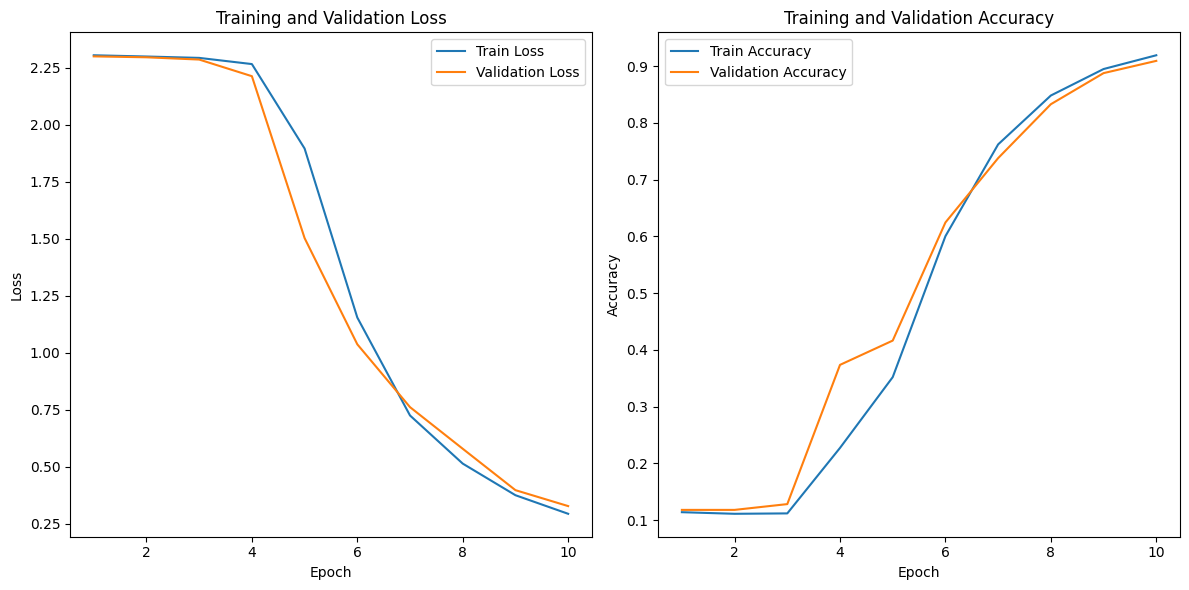

Training with hidden layer: 5 with values: [256, 128, 64, 32, 16]
Epoch 1/10
  Train Loss: 2.3043, Train Accuracy: 0.1024
  Val Loss: 2.3006, Val Accuracy: 0.1034
Epoch 2/10
  Train Loss: 2.2996, Train Accuracy: 0.1177
  Val Loss: 2.2969, Val Accuracy: 0.1181
Epoch 3/10
  Train Loss: 2.2955, Train Accuracy: 0.1112
  Val Loss: 2.2908, Val Accuracy: 0.1181
Epoch 4/10
  Train Loss: 2.2836, Train Accuracy: 0.1124
  Val Loss: 2.2662, Val Accuracy: 0.1284
Epoch 5/10
  Train Loss: 2.1696, Train Accuracy: 0.2548
  Val Loss: 1.8487, Val Accuracy: 0.3177
Epoch 6/10
  Train Loss: 1.3063, Train Accuracy: 0.5109
  Val Loss: 1.0793, Val Accuracy: 0.6059
Epoch 7/10
  Train Loss: 0.8147, Train Accuracy: 0.7269
  Val Loss: 0.6665, Val Accuracy: 0.7814
Epoch 8/10
  Train Loss: 0.5684, Train Accuracy: 0.8238
  Val Loss: 0.4828, Val Accuracy: 0.8597
Epoch 9/10
  Train Loss: 0.4262, Train Accuracy: 0.8768
  Val Loss: 0.3693, Val Accuracy: 0.8981
Epoch 10/10
  Train Loss: 0.3449, Train Accuracy: 0.9041
  Va

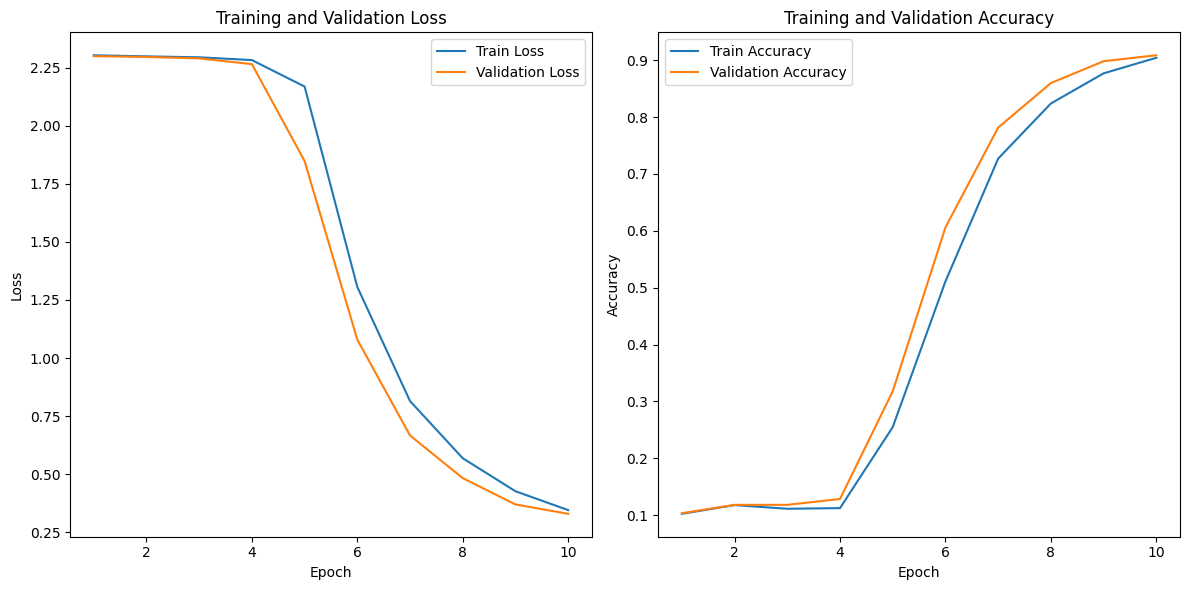

Training with hidden layer: 5 with values: [128, 64, 32, 16, 8]
Epoch 1/10
  Train Loss: 2.3122, Train Accuracy: 0.1044
  Val Loss: 2.3040, Val Accuracy: 0.1044
Epoch 2/10
  Train Loss: 2.3023, Train Accuracy: 0.1047
  Val Loss: 2.2999, Val Accuracy: 0.1393
Epoch 3/10
  Train Loss: 2.2999, Train Accuracy: 0.1113
  Val Loss: 2.2978, Val Accuracy: 0.1181
Epoch 4/10
  Train Loss: 2.2971, Train Accuracy: 0.1112
  Val Loss: 2.2936, Val Accuracy: 0.1181
Epoch 5/10
  Train Loss: 2.2871, Train Accuracy: 0.1147
  Val Loss: 2.2728, Val Accuracy: 0.1536
Epoch 6/10
  Train Loss: 2.1707, Train Accuracy: 0.2380
  Val Loss: 1.9578, Val Accuracy: 0.2450
Epoch 7/10
  Train Loss: 1.6971, Train Accuracy: 0.3081
  Val Loss: 1.5518, Val Accuracy: 0.3519
Epoch 8/10
  Train Loss: 1.4645, Train Accuracy: 0.4516
  Val Loss: 1.3622, Val Accuracy: 0.5233
Epoch 9/10
  Train Loss: 1.2429, Train Accuracy: 0.5738
  Val Loss: 1.1092, Val Accuracy: 0.6299
Epoch 10/10
  Train Loss: 1.0227, Train Accuracy: 0.6673
  Val 

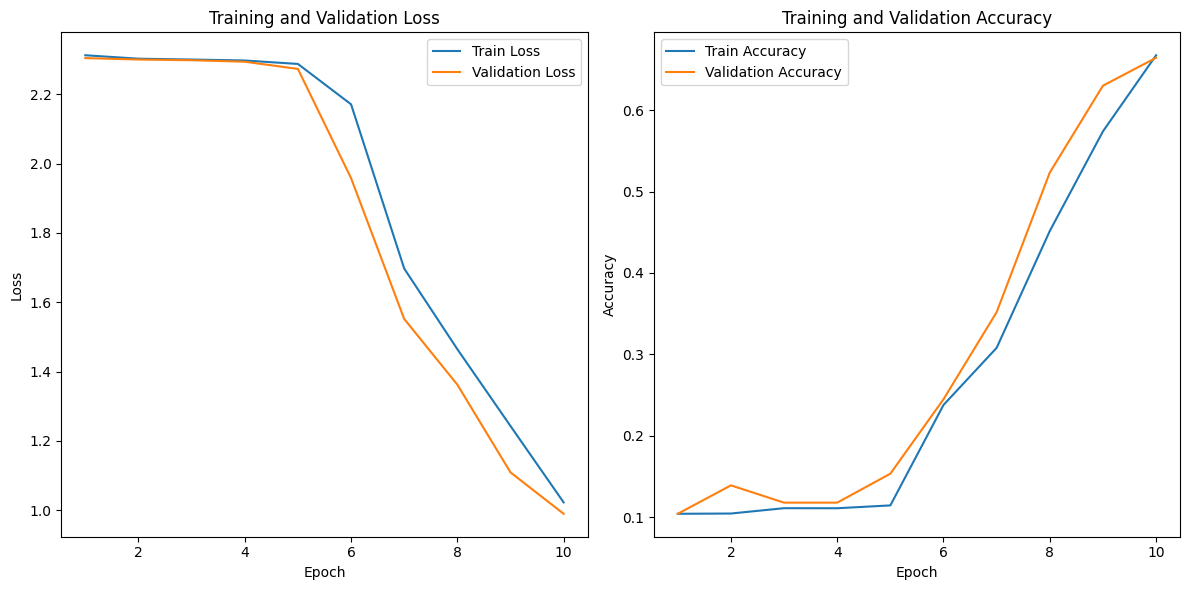

In [39]:
for neuron in neurons:
    mymodel = NeuralNet(neuron)
    criterion =nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(mymodel.parameters(), lr=0.01)
    print(f"Training with hidden layer: {len(neuron)} with values: {neuron}")
    train_losses, val_losses, train_accuracies, val_accuracies = train_mymodel(mymodel, train_loader, val_loader, criterion, optimizer, epochs)
    plot_loss_accuracy(train_losses, val_losses, train_accuracies, val_accuracies)
    
    max_val_accuracy = max(val_accuracies)
    
    # Update the best neuron configuration
    if max_val_accuracy > best_neurons_config["val_accuracy"]:
        best_neurons_config.update({"neurons": neuron, "val_accuracy": max_val_accuracy})
    if max_val_accuracy > combined_best_config["val_accuracy"]:
        combined_best_config.update({"learning_rate": 0.01, "batch_size": 64, "neurons": neuron, "val_accuracy": max(val_accuracies)})


evaluating the model using the best combination of: learning rate, batch size, neurons number and layers number


Training and evaluating the best combined model on test set...
Epoch 1/10
  Train Loss: 0.5551, Train Accuracy: 0.8421
  Val Loss: 0.2914, Val Accuracy: 0.9129
Epoch 2/10
  Train Loss: 0.2160, Train Accuracy: 0.9374
  Val Loss: 0.2116, Val Accuracy: 0.9374
Epoch 3/10
  Train Loss: 0.1478, Train Accuracy: 0.9569
  Val Loss: 0.1382, Val Accuracy: 0.9574
Epoch 4/10
  Train Loss: 0.1132, Train Accuracy: 0.9670
  Val Loss: 0.1192, Val Accuracy: 0.9632
Epoch 5/10
  Train Loss: 0.0901, Train Accuracy: 0.9731
  Val Loss: 0.1310, Val Accuracy: 0.9627
Epoch 6/10
  Train Loss: 0.0735, Train Accuracy: 0.9782
  Val Loss: 0.1095, Val Accuracy: 0.9658
Epoch 7/10
  Train Loss: 0.0623, Train Accuracy: 0.9813
  Val Loss: 0.1014, Val Accuracy: 0.9708
Epoch 8/10
  Train Loss: 0.0527, Train Accuracy: 0.9839
  Val Loss: 0.1007, Val Accuracy: 0.9678
Epoch 9/10
  Train Loss: 0.0453, Train Accuracy: 0.9865
  Val Loss: 0.1850, Val Accuracy: 0.9446
Epoch 10/10
  Train Loss: 0.0393, Train Accuracy: 0.9881
  Val 

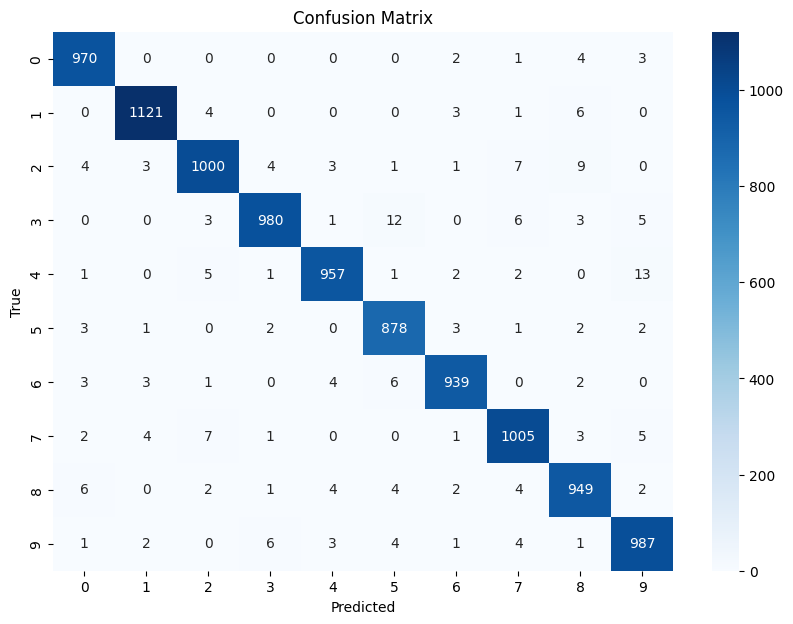


Best Configurations:
  Best Learning Rate: 0.1 (Validation Accuracy: 0.9723)
  Best Batch Size: 32 (Validation Accuracy: 0.9458)
  Best Neurons: [512, 256] (Validation Accuracy: 0.8886)
  Combined Best Configuration: {'learning_rate': 0.1, 'batch_size': 64, 'neurons': [128, 64], 'val_accuracy': 0.9723}


In [38]:
# Re-train and evaluate the final combined best model
print("\nTraining and evaluating the best combined model on test set...")
train_loader = DataLoader(train_dataset, batch_size=combined_best_config["batch_size"], shuffle=True)
mymodel = NeuralNet(combined_best_config["neurons"])  # Initialize the best model
optimizer = torch.optim.SGD(mymodel.parameters(), lr=combined_best_config["learning_rate"])
train_mymodel(mymodel, train_loader, val_loader, criterion, optimizer, epochs)
evaluate_model(mymodel, test_loader)

# Print the best configurations
print("\nBest Configurations:")
print(f"  Best Learning Rate: {best_lr_config['learning_rate']} (Validation Accuracy: {best_lr_config['val_accuracy']:.4f})")
print(f"  Best Batch Size: {best_bs_config['batch_size']} (Validation Accuracy: {best_bs_config['val_accuracy']:.4f})")
print(f"  Best Neurons: {best_neurons_config['neurons']} (Validation Accuracy: {best_neurons_config['val_accuracy']:.4f})")
print(f"  Combined Best Configuration: {combined_best_config}")

Comment on result:

Learning Rate (Best: 0.1, Validation Accuracy: 0.9723)
A high learning rate of 0.1 performs the best, suggesting that the model converges quickly without overshooting. Lower learning rates likely required more epochs for similar performance.

Batch Size (Best: 32, Validation Accuracy: 0.9458)
A smaller batch size of 32 yielded the best accuracy, due to better gradient updates capturing finer details in the data.

Neurons (Best: [512, 256], Validation Accuracy: 0.8886)
The simpler architecture with fewer layers ([512, 256]) outperformed deeper configurations. Increasing the number of layers adds unnecessary complexity leading to slower convergence.

Combined Best Configuration (Validation Accuracy: 0.9723)
The optimal combination of parameters is not the same is testing each parameter alone.
The optimal combination of parameters is a high learning rate (0.1), moderate batch size (64), and simpler neuron configuration ([128, 64]). This setup balances efficient training, generalization, and architectural simplicity